# Hazard: Tropical cyclones

Tropical cyclones tracks are gathered in the class `TCTracks` and then provided to the hazard `TropCyclone` which computes the wind gusts at each centroid. `TropCyclone` inherits from `Hazard` and has an associated hazard type `TC`.

# TCTracks class

`TCTracks` reads and handles historical tropical cyclone tracks of the [IBTrACS](https://www.ncdc.noaa.gov/ibtracs/) repository. It also generates synthetic tracks from the historical ones using Wiener processes.

The tracks are stored in the attribute `data`, which is a list of `xarray`'s `Dataset` (see [xarray.Dataset](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html)). Each `Dataset` contains the following variables:

    - time (coords)
    - lat (coords)
    - lon (coords)
    - time_step
    - radius_max_wind
    - max_sustained_wind
    - central_pressure
    - environmental_pressure
    - max_sustained_wind_unit (attrs)
    - central_pressure_unit (attrs)
    - sid (attrs)
    - name (attrs)
    - orig_event_flag (attrs)
    - data_provider (attrs)
    - basin (attrs)
    - id_no (attrs)
    - category (attrs)


The method `read_ibtracs_netcdf()` generates the `Datasets` for tracks selected by IBTrACS id, or by basin and year range. To achieve this, it downloads the first time the [IBTrACS data v4 in netcdf format](ftp://eclipse.ncdc.noaa.gov/pub/ibtracs//v04r00/provisional/netcdf/IBTrACS.ALL.v04r00.nc) and stores it in `climada_python/data/system`. The tracks can be accessed later either using the attribute `data` or using `get_track()`, which allows to select tracks by its name or id. Use the method `append()` to extend the `data` list.

If you get an error downloading the IBTrACS data, try to manually access [ftp://eclipse.ncdc.noaa.gov/pub/ibtracs//v04r00/provisional/netcdf/](ftp://eclipse.ncdc.noaa.gov/pub/ibtracs//v04r00/provisional/netcdf/), connect as a *Guest* and copy the file `IBTrACS.ALL.v04r00.nc` to `climada_python/data/system`.

To visualize the tracks use `plot()`.


2019-05-16 22:07:25,528 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf
2019-05-16 22:07:30,009 - climada.hazard.tc_tracks - INFO - Reading 2017242N16333: IRMA


/Users/aznarsig/anaconda3/envs/climada_up/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


2019-05-16 22:07:34,240 - climada.hazard.tc_tracks - INFO - Reading 1993162N10245: ADRIAN
2019-05-16 22:07:34,464 - climada.hazard.tc_tracks - INFO - Reading 1993169N13265: BEATRIZ
2019-05-16 22:07:34,664 - climada.hazard.tc_tracks - INFO - Reading 1993178N14265: NOT_NAMED
2019-05-16 22:07:34,809 - climada.hazard.tc_tracks - WARNING - Skipping 1993178N14265. No usable data.
2019-05-16 22:07:34,811 - climada.hazard.tc_tracks - INFO - Reading 1993186N13262: CALVIN
2019-05-16 22:07:35,022 - climada.hazard.tc_tracks - INFO - Reading 1993196N11241: DORA
2019-05-16 22:07:35,234 - climada.hazard.tc_tracks - INFO - Reading 1993197N11247: EUGENE
2019-05-16 22:07:35,449 - climada.hazard.tc_tracks - INFO - Reading 1993221N12216: KEONI
2019-05-16 22:07:35,596 - climada.hazard.tc_tracks - WARNING - Skipping 1993221N12216. No usable data.
2019-05-16 22:07:35,599 - climada.hazard.tc_tracks - INFO - Reading 1993221N13256: FERNANDA
2019-05-16 22:07:35,824 - climada.hazard.tc_tracks - INFO - Reading 199

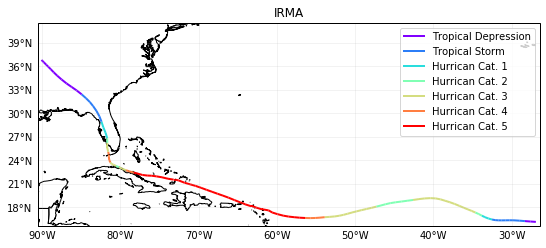

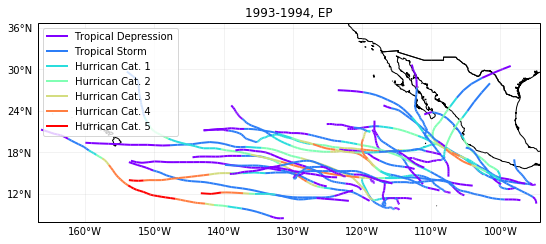

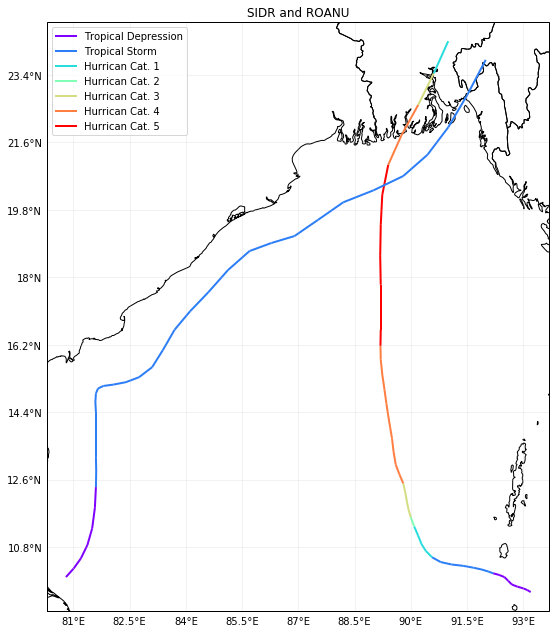

In [1]:
%matplotlib inline
from climada.hazard import TCTracks

tr_irma = TCTracks()
tr_irma.read_ibtracs_netcdf(provider='usa', storm_id='2017242N16333') # IRMA 2017
fig, ax = tr_irma.plot()
ax.set_title('IRMA') # set title

# other ibtracs selection options
from climada.hazard import TCTracks
sel_ibtracs = TCTracks()
sel_ibtracs.read_ibtracs_netcdf(provider='usa', year_range=(1993, 1994), basin='EP') # years 1993 and 1994 in basin EP
print('Number of tracks:', sel_ibtracs.size)
fig, ax = sel_ibtracs.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('1993-1994, EP') # set title

track1 = TCTracks()
track1.read_ibtracs_netcdf(provider='usa', storm_id='2007314N10093') # SIDR 2007
track2 = TCTracks()
track2.read_ibtracs_netcdf(provider='usa', storm_id='2016138N10081') # ROANU 2016
track1.append(track2.data) # put both tracks together
fig, ax = track1.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('SIDR and ROANU'); # set title

In [2]:
tr_irma.get_track('2017242N16333')

<xarray.Dataset>
Dimensions:                 (time: 123)
Coordinates:
  * time                    (time) datetime64[ns] 2017-08-30 ... 2017-09-13T12:00:00
    lat                     (time) float32 16.1 16.147842 ... 36.495224 36.8
    lon                     (time) float32 -26.9 -27.592503 ... -89.794334 -90.1
Data variables:
    radius_max_wind         (time) float64 0.0 0.0 0.0 20.0 ... 60.0 60.0 60.0
    max_sustained_wind      (time) float64 30.0 32.0 35.0 ... 15.0 15.0 15.0
    central_pressure        (time) float64 1.008e+03 1.007e+03 ... 1.005e+03
    environmental_pressure  (time) float64 1.012e+03 1.012e+03 ... 1.008e+03
    time_step               (time) float64 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
Attributes:
    max_sustained_wind_unit:  kn
    central_pressure_unit:    mb
    name:                     IRMA
    sid:                      2017242N16333
    orig_event_flag:          True
    data_provider:            usa
    basin:                    NA
    id_no:             

Once tracks are present in `TCTracks`, one can generate synthetic tracks for each present track using `calc_random_walk()` and interpolate all the tracks to the same timestep using `equal_timestep()`.

2019-05-16 22:07:54,136 - climada.hazard.tc_tracks - INFO - Computing 5 synthetic tracks.
2019-05-16 22:07:56,393 - climada.hazard.tc_tracks - DEBUG - No historical track of category Tropical Depression with landfall. Decay parameters from category Hurrican Cat. 3 taken.
2019-05-16 22:07:56,393 - climada.hazard.tc_tracks - DEBUG - No historical track of category Tropical Storm with landfall. Decay parameters from category Hurrican Cat. 3 taken.
2019-05-16 22:07:56,394 - climada.hazard.tc_tracks - DEBUG - No historical track of category Hurrican Cat. 1 with landfall. Decay parameters from category Hurrican Cat. 3 taken.
2019-05-16 22:07:56,395 - climada.hazard.tc_tracks - DEBUG - No historical track of category Hurrican Cat. 2 with landfall. Decay parameters from category Hurrican Cat. 3 taken.
2019-05-16 22:07:56,397 - climada.hazard.tc_tracks - DEBUG - No historical track of category Hurrican Cat. 4 with landfall. Decay parameters from category Hurrican Cat. 5 taken.


(<Figure size 648x936 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x1a1f485160>)

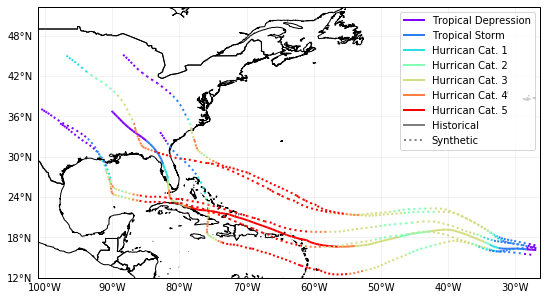

In [3]:
tr_irma.calc_random_walk(ens_size=5) # select number of synthetic tracks to generate per present tracks
tr_irma.plot()

In [4]:
tr_irma.data[-1] # last synthetic track. notice the value of orig_event_flag and name

<xarray.Dataset>
Dimensions:                 (time: 123)
Coordinates:
  * time                    (time) datetime64[ns] 2017-08-30 ... 2017-09-13T12:00:00
    lat                     (time) float64 15.39 15.49 15.6 ... 34.59 34.79 35.0
    lon                     (time) float64 -27.64 -28.42 ... -97.51 -97.84
Data variables:
    radius_max_wind         (time) float64 0.0 0.0 0.0 20.0 ... 60.0 60.0 60.0
    max_sustained_wind      (time) float64 30.0 32.0 35.0 ... 12.01 11.31 10.58
    central_pressure        (time) float64 1.008e+03 1.007e+03 ... 999.2 999.8
    environmental_pressure  (time) float64 1.012e+03 1.012e+03 ... 1.008e+03
    time_step               (time) float64 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
    on_land                 (time) bool False False False ... True True True
    dist_since_lf           (time) float64 nan nan nan nan ... 804.3 838.2 875.9
Attributes:
    max_sustained_wind_unit:  kn
    central_pressure_unit:    mb
    name:                     IRMA_gen5
   

2019-05-16 22:07:58,986 - climada.hazard.tc_tracks - INFO - Interpolating 6 tracks to 1h time steps.


(<Figure size 648x936 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x1a20671c18>)

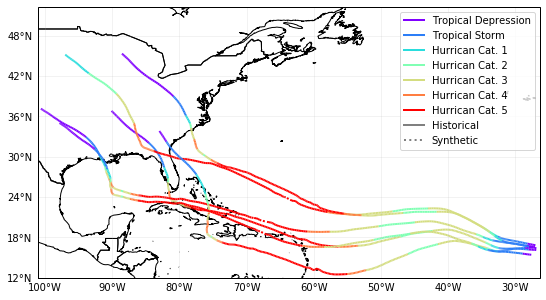

In [5]:
tr_irma.equal_timestep(time_step_h=1) # select number of synthetic tracks to generate per present tracks
tr_irma.plot()

### EXERCISE

Using the first synthetic track generated,

1. Which is the time frequency of the data?
2. Compute the maximum sustained wind for each day.

In [6]:
# Put your code here





In [7]:
# SOLUTION:
import numpy as np
# select the track
tc_syn = tr_irma.get_track('2017242N16333_gen1')

# 1. Which is the time frequency of the data?
# The values of a DataArray are numpy.arrays. 
# The nummpy.ediff1d computes the different between elements in an array
diff_time_ns = np.ediff1d(tc_syn.time)
diff_time_h = diff_time_ns.astype(int)/1000/1000/1000/60/60
print('Mean time frequency in hours:', diff_time_h.mean())
print('Std time frequency in hours:', diff_time_h.std())
print()

# 2. Compute the maximum sustained wind for each day.
print('Daily max sustained wind:', tc_syn.max_sustained_wind.groupby('time.day').max())

Mean time frequency in hours: 1.0
Std time frequency in hours: 0.0

Daily max sustained wind: <xarray.DataArray 'max_sustained_wind' (day: 15)>
array([100.      , 100.      , 100.      , 123.333333, 155.      , 155.      ,
       150.      , 144.      , 145.      , 130.291495, 113.852824,  92.890059,
        76.949128,  54.      ,  99.      ])
Coordinates:
  * day      (day) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 30 31


# TropCyclone class

The `TropCyclone` class is a derived class of [Hazard](climada_hazard_Hazard.ipynb). As such, it contains all the attributes and methods of a `Hazard`. Additionally, it contains the method `set_from_tracks()` to model tropical cyclones from tracks contained in a `TCTracks` instance. 

When setting tropical cyclones from tracks, the centroids where to map the wind gusts (the hazard intensity) can be provided. If no centroids are provided, the global centroids `GLB_NatID_grid_0360as_adv_2.mat` are used. The method used to calculate the wind gusts can also be configured. The default is the method of Holland 2008.

2019-05-16 22:08:03,175 - climada.hazard.centroids.centr - DEBUG - Setting dist_coast 3822 points.
2019-05-16 22:08:03,508 - climada.hazard.trop_cyclone - INFO - Mapping 6 tracks to 3822 centroids.
2019-05-16 22:08:08,918 - climada.hazard.trop_cyclone - DEBUG - Append events.
2019-05-16 22:08:08,933 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a21e89eb8>]],
       dtype=object))

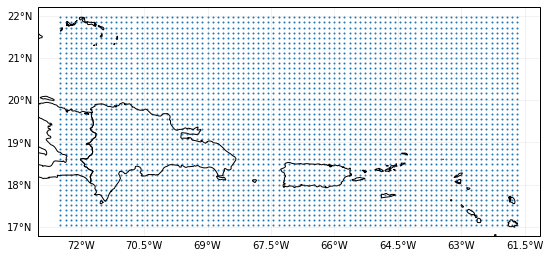

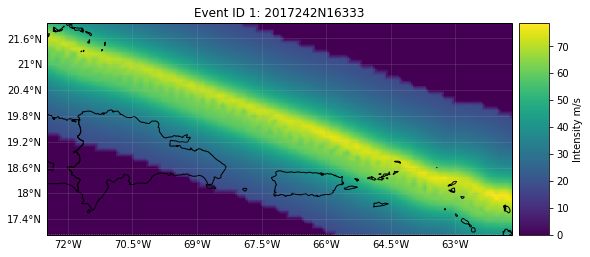

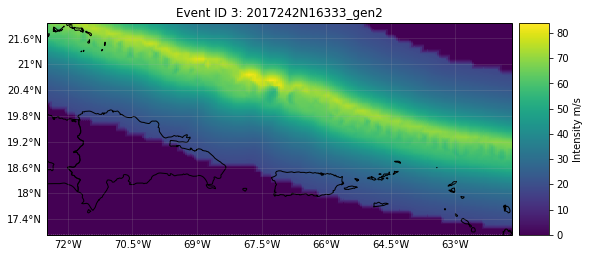

In [8]:
from climada.hazard import Centroids, TropCyclone

# construct centroids
min_lat, max_lat, min_lon, max_lon = 16.99375, 21.95625, -72.48125, -61.66875
resol = 50
cent = Centroids()
cent.set_raster_from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.12)
cent.check()
cent.plot()

# construct tropical cyclones
tc_irma = TropCyclone()
tc_irma.set_from_tracks(tr_irma, centroids=cent)
#tc_irma.set_from_tracks(tr_irma) # try without given centroids
tc_irma.check()
tc_irma.plot_intensity('2017242N16333')      # IRMA
tc_irma.plot_intensity('2017242N16333_gen2') # IRMA's synthetic track 2

## Multiprocessing - improving performance for big computations

Multiprocessing is implemented in the tropical cyclones. When dealing with a big amount of data, you might consider using it as follows:

In [ ]:
# execute these lines in a console, outside Jupyter Notebook

from climada.hazard import TCTracks, Centroids, TropCyclone
from pathos.pools import ProcessPool as Pool

pool = Pool() # start a pathos pool

tc_track = TCTracks(pool)  # provide the pool in the constructor   
tc_track.read_ibtracs_netcdf(provider='usa', year_range=(1992, 1994), basin='EP')
tc_track.calc_random_walk()
tc_track.equal_timestep()

lon_min, lat_min, lon_max, lat_max = -160, 10, -100, 36
centr = Centroids()
centr.set_raster_from_pnt_bounds((lon_min, lat_min, lon_max, lat_max), 0.1)

tc_haz = TropCyclone(pool) # provide the pool in the constructor   
tc_haz.set_from_tracks(tc_track, centr)
tc_haz.check()

pool.close()
pool.join()